# Implementasi Image Enhancement
Image enhancement bertujuan untuk memanipulasi citra sehingga gambar yang dihasilkan akan lebih mudah diambil informasinya. Citra yang telah diakuisisi terkadang memiliki hasil yang sulit untuk komputer maupun manusia pahami, contoh seperti gambar yang blur, gelap, terlalu terang ataupun low contrast. Pada kesempatan kali ini saya akan mengimplementasikan image enhancement.<br><br>
Danar Fathurahman<br>
24/538200/PA/22828

# Import Library dan Load Data

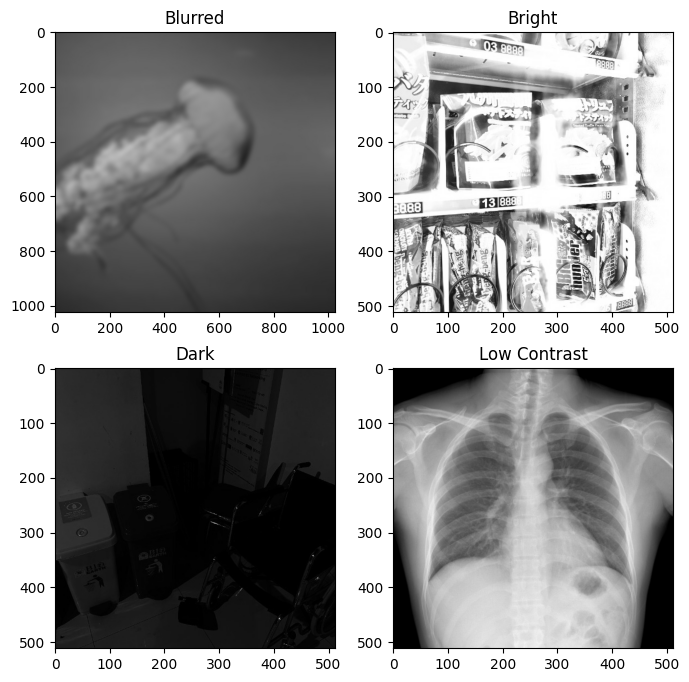

In [39]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

blurred = cv2.imread('/content/blurred.jpg')
bright = cv2.imread('/content/bright_image.jpg')
dark = cv2.imread('/content/dark_image.jpg')
low_contrast = cv2.imread('/content/low_contrast.jpg')

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred")

plt.subplot(2,2,2)
plt.imshow(bright, cmap='gray')
plt.title("Bright")

plt.subplot(2,2,3)
plt.imshow(dark, cmap='gray')
plt.title("Dark")

plt.subplot(2,2,4)
plt.imshow(low_contrast, cmap='gray')
plt.title("Low Contrast")

plt.show()

# Bright Image
Di sini saya menggunakan dua metode untuk memproses bright image atau citra yang terang menjadi lebih seimbang sehingga dapat dengan mudah dapat diambil informasinya. Dua metode yang akan saya gunakan: <br>
- Gamma Correction
- Piecewise Linear

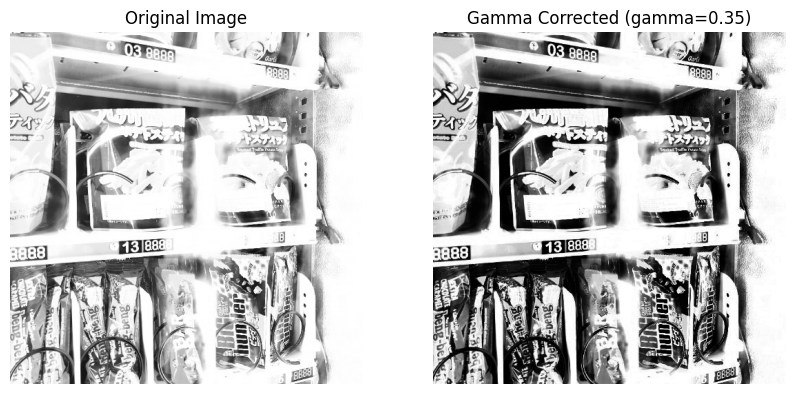

In [57]:
# Gammar Correction
def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma = 0.35
gamma_corrected_image = gamma_correction(bright, gamma=gamma)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bright, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title(f'Gamma Corrected (gamma={gamma})')
plt.axis('off')

plt.show()

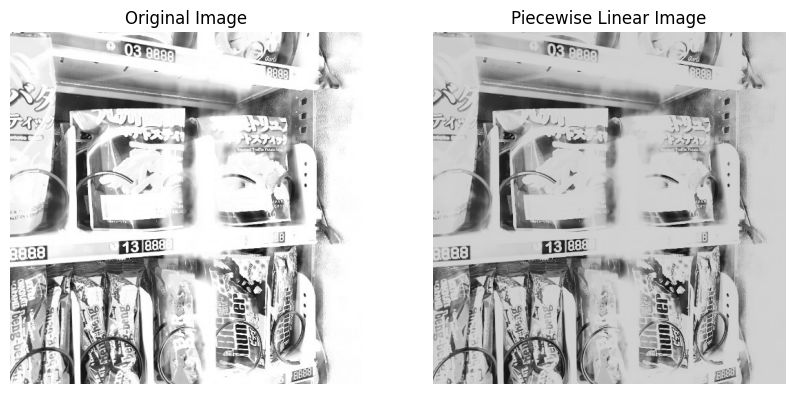

In [62]:
# Piecewise shoulder
def piecewise_shoulder(gray_u8, pivot=180, slope_hi=0.4):
    g = gray_u8.astype(np.float32)
    lo = g <= pivot
    hi = ~lo
    out = np.empty_like(g)

    out[lo] = g[lo]

    out[hi] = pivot + slope_hi*(g[hi] - pivot)
    return np.uint8(np.clip(out, 0, 255))

log_transformed_image = piecewise_shoulder(bright)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bright, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Piecewise Linear Image')
plt.axis('off')

plt.show()

## Analisis
Kedua metode tersebut berhasil membuat gambar terang menjadi lebih seimbang sehingga dalam gambar dapat diambil arti, yakni vending machine yang berisikan snack-snack. Perbandingan kedua metode tersebut:
- Gamma correction dengan nilai gamma=0.35 memberikan hasil yang lebih jelas dan kontras jika dibandingkan dengan gambar awal
- Piecewise Linear memiliki hasil yang cukup. Jika dibandingkan dengan gamma correction, Piecewise Linear memiliki hasil yang berbeda, yakni tidak sekontras gamma correction.

# Dark Image
Di sini saya menggunakan dua metode untuk memproses bright image atau citra yang terang menjadi lebih seimbang sehingga dapat dengan mudah dapat diambil informasinya. Dua metode yang akan saya gunakan: <br>
- Gamma Correction
- Log Transform

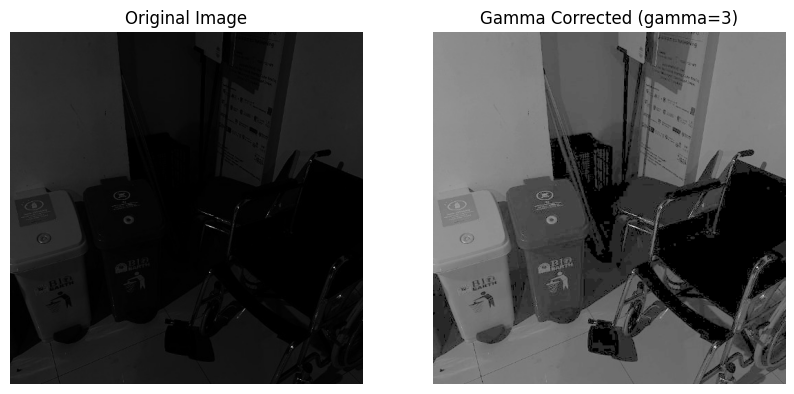

In [34]:
# Gammar Correction
def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma = 3
gamma_corrected_image = gamma_correction(dark, gamma=gamma)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dark, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title(f'Gamma Corrected (gamma={gamma})')
plt.axis('off')

plt.show()

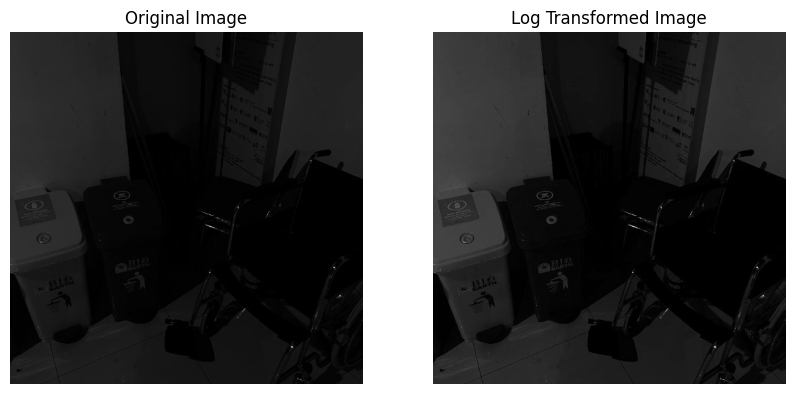

In [65]:
# Log transform
def log_transform(gray_u8, c=5.0):
    g = c*np.log1p(gray_u8/255.0)
    g = g/ g.max() * 255
    return np.uint8(g)

log_transformed_image = log_transform(dark)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dark, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.show()

## Analisis
Kedua metode tersebut berhasil membuat gambar gelap menjadi lebih seimbang sehingga dalam gambar dapat diambil arti, yakni terdapat tong sampah dan kursi roda. Perbandingan kedua metode tersebut:
- Gamma correction dengan nilai gamma=1.0 memberikan hasil yang lebih jelas dan kontras jika dibandingkan dengan gambar awal.
- Log transform (c=5.0) memiliki hasil yang cukup. Jika dibandingkan dengan gamma correction, log transform memiliki hasil yang sedikit jelas. Namun jauh lebih jelas gamma correction.

# Blurred Image
Di sini saya menggunakan dua metode untuk memproses blurred image atau citra yang 'kabur' menjadi lebih jelas sehingga dapat dengan mudah dapat diambil informasinya. Dua metode yang akan saya gunakan: <br>
- Gamma Correction
- Log Transform

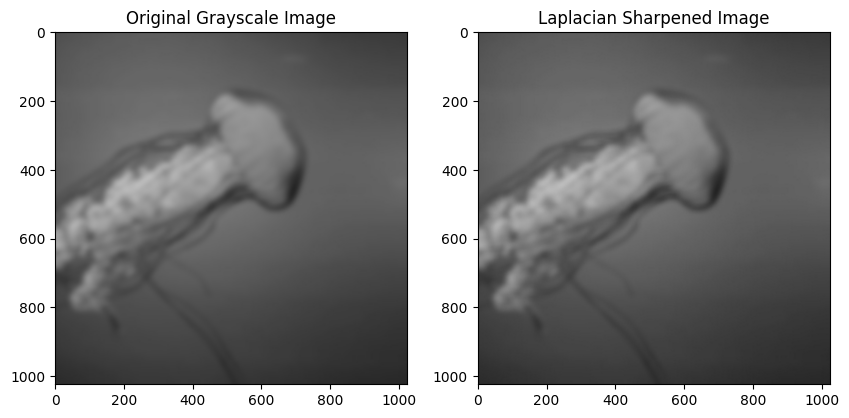

In [54]:
# Laplacian Filter for Sharpening
# Convert the image to grayscale

sigma = 3       # try 0.8–2.5
amount = 1.0       # try 0.5–1.5
blur = cv2.GaussianBlur(blurred, (0,0), sigma)
sharp = cv2.addWeighted(blurred, 1+amount, blur, -amount, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(sharp, cmap='gray')
plt.title('Laplacian Sharpened Image')


plt.show()

## Analisis
Metode laplacian sedikit membuat gambar menjadi lebih jelas dengan memperdetail edge dari citra tersebut. Karena gambar original sudah cukup blur, maka implementasi untuk menghilangkan blur cukup sulit. Namun dengan metode laplacian membuat gambar ubur-ubur menjadi lebih baik sedikit.

# Low Contrast Image
Di sini saya menggunakan dua metode untuk memproses bright image atau citra yang terang menjadi lebih seimbang sehingga dapat dengan mudah dapat diambil informasinya. Dua metode yang akan saya gunakan: <br>
- CLAHE (Contrast Limited Adaptive Histogram Equalization)


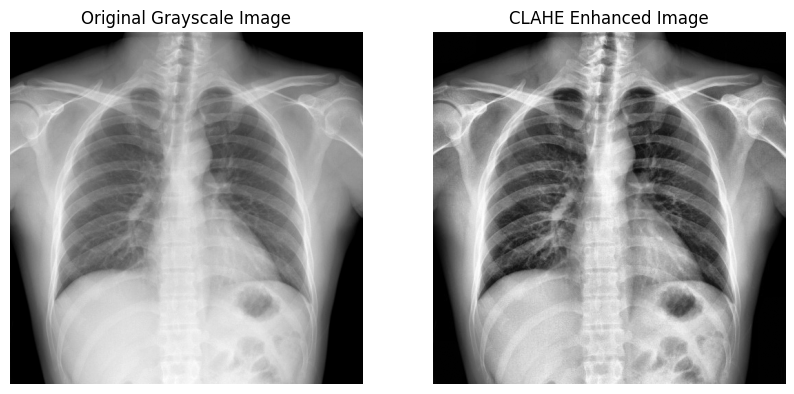

In [68]:
# CLAHE
gray_low_contrast = cv2.cvtColor(low_contrast, cv2.COLOR_BGR2GRAY)

# Membuat objek metode CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
clahe_image = clahe.apply(gray_low_contrast)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_low_contrast, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.axis('off')

plt.show()

## Analisis
Metode CLAHE atau histogram equalization sangat baik untuk membuat citra x-ray dada menjadi lebih jelas dan kontras. Dapat dilihat bahwa bagian dalam dada tertera jelas dan muncul bagian dalam tubuh. Hal ini membuat citra x-ray menjadi lebih mudah dianalisis lebih lanjut.